Objective:
    1) To analysis which factor is most affects for heart diseases
    2) To analyse which age group has more chances to get heart attack

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,auc

In [2]:
df= pd.read_csv("C:\\Users\\mahes\\Downloads\\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
#data first 5 row
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#data last 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Let, we get some basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#no of row and no of column
df.shape

(1025, 14)

In [9]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

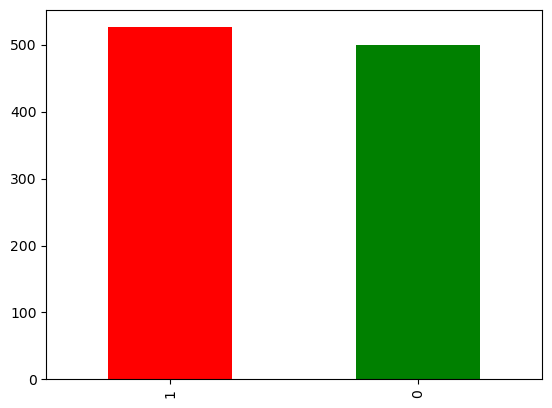

In [10]:
df['target'].value_counts().plot(kind='bar', color=['red','green']);

In [11]:
# let us look at whether the dataset has null values or not.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 From this output, our data does not contain null values and duplicates.
 So,the data is good which will be further analyzed.

In [12]:
df_dup =df.duplicated().any()

In [13]:
df_dup

True

In [14]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

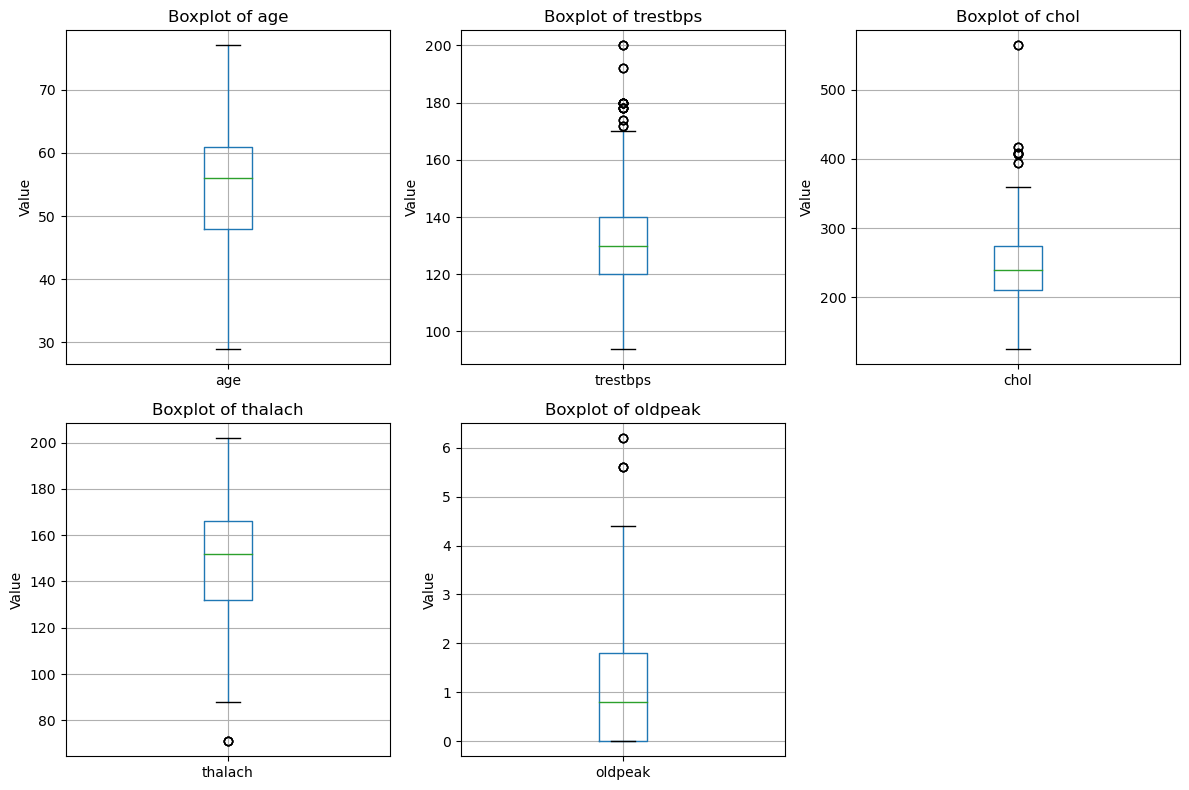

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your heart disease prediction dataset loaded into a pandas DataFrame

# Select relevant features for visualization
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create boxplots for each feature to visualize outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    df.boxplot(column=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
len(df)

1025

In [18]:
713/1025

0.6956097560975609

In [19]:
312/1025

0.304390243902439

In [20]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


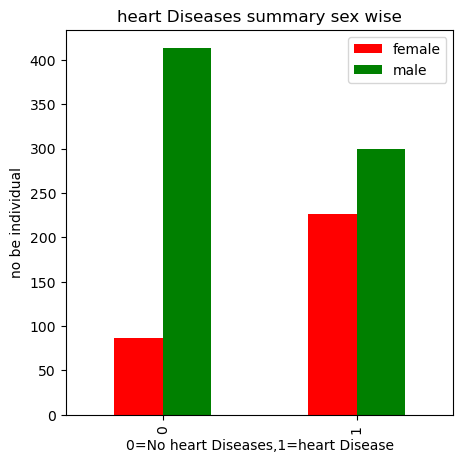

In [21]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(5,5),
                                  color=['red','green'])
plt.title('heart Diseases summary sex wise')
plt.xlabel('0=No heart Diseases,1=heart Disease')
plt.ylabel('no be individual')
plt.legend(['female','male'])


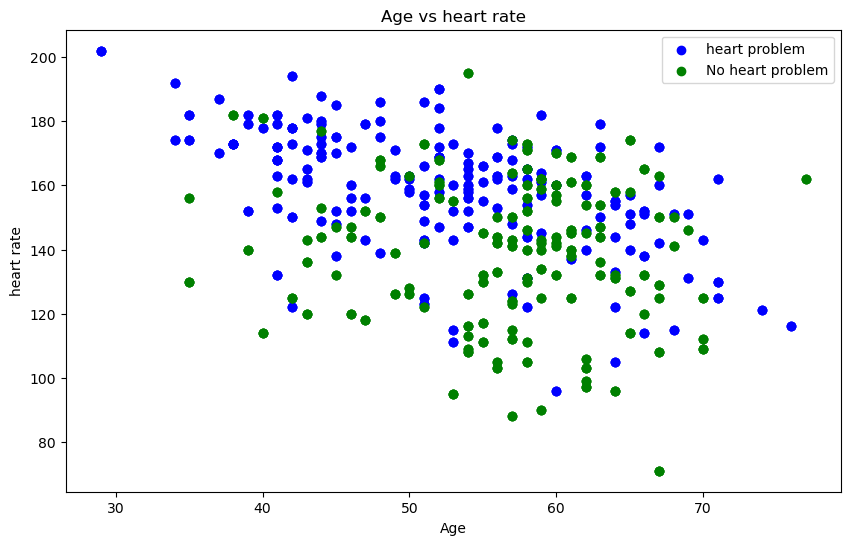

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='blue')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green')
plt.title('Age vs heart rate')
plt.xlabel('Age')
plt.ylabel('heart rate')
plt.legend(['heart problem','No heart problem'])

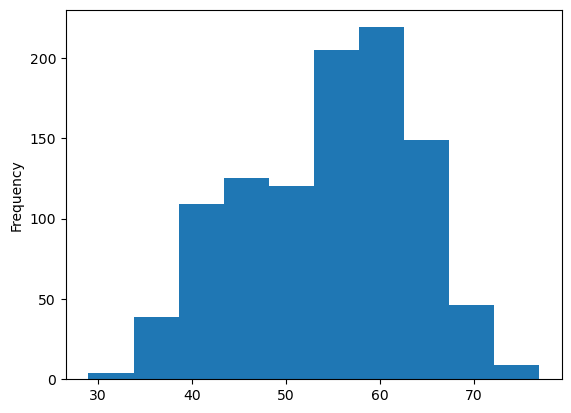

In [23]:
df.age.plot.hist();

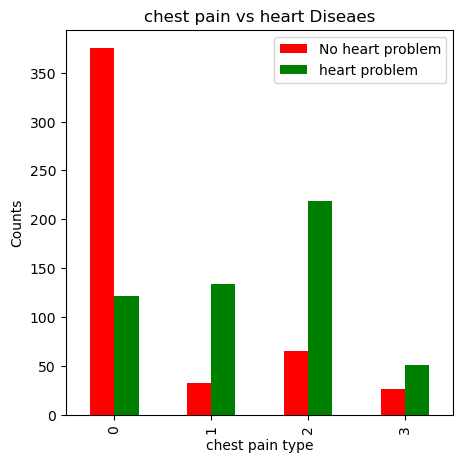

In [24]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(5,5),
                                  color=['red','green'])
plt.title('chest pain vs heart Diseaes')
plt.xlabel('chest pain type')
plt.ylabel('Counts')
plt.legend(['No heart problem','heart problem'])

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


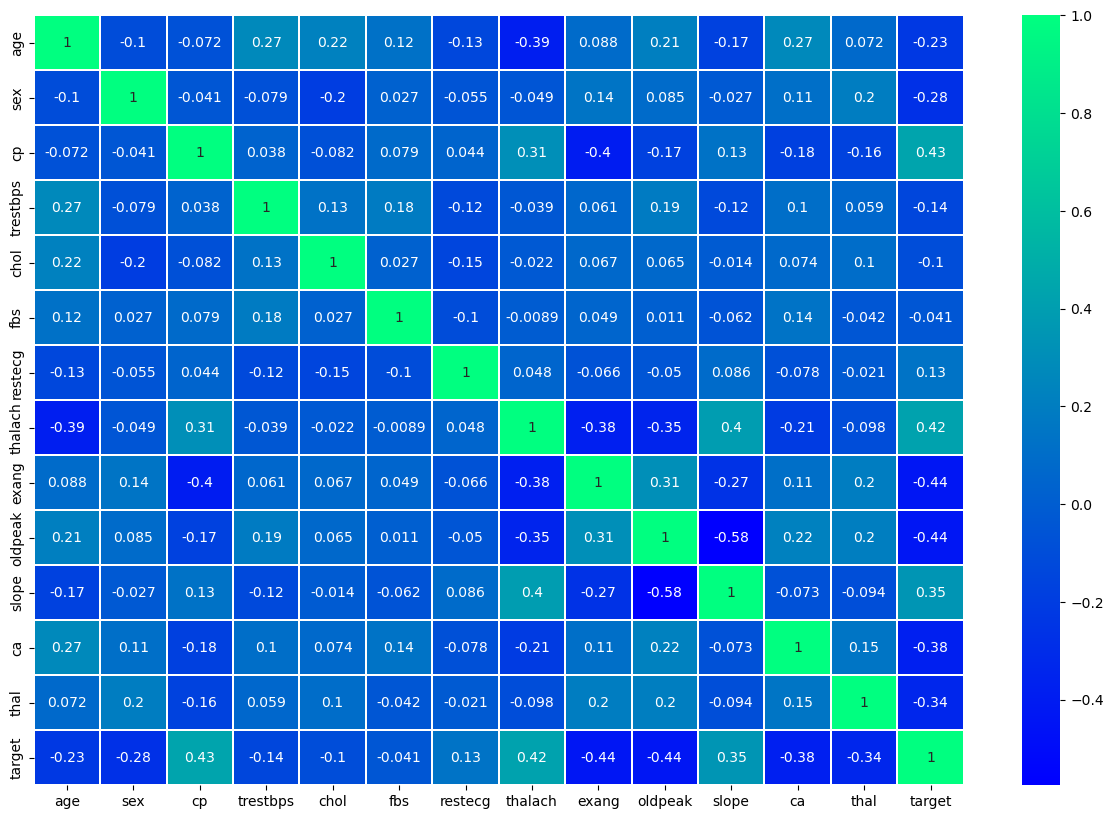

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

we can understand that Chest pain(cp) and target have a positive correlation. 
It means that whose has a large risk of chest pain results in a greater chance to have heart disease. 
In addition to chest pain, thalach, slope,and resting have a positive correlation with the target.
exang and the target have a negative correlation which means when we exercise, 
the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, 
thal have a negative correlation with the target.

# Splitting the dataset into the Training Set and Test Set

In [27]:
x=df.drop('target', axis=1)
y=df['target']

In [28]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [30]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [31]:
x=df.drop('target', axis=1)
y=df['target']

In [32]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [33]:
np.random.seed(7)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# logistic Regression

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:
[[73 29]
 [13 90]]


# Decision tree

In [35]:
from sklearn import tree

In [36]:
learner = tree.DecisionTreeClassifier(random_state=42)
learner.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_train_pred = learner.predict(x_train)

In [38]:
y_test_pred = learner.predict(x_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming x_train, y_train, x_test, y_test are already defined

# Create a Decision Tree classifier with a random state
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

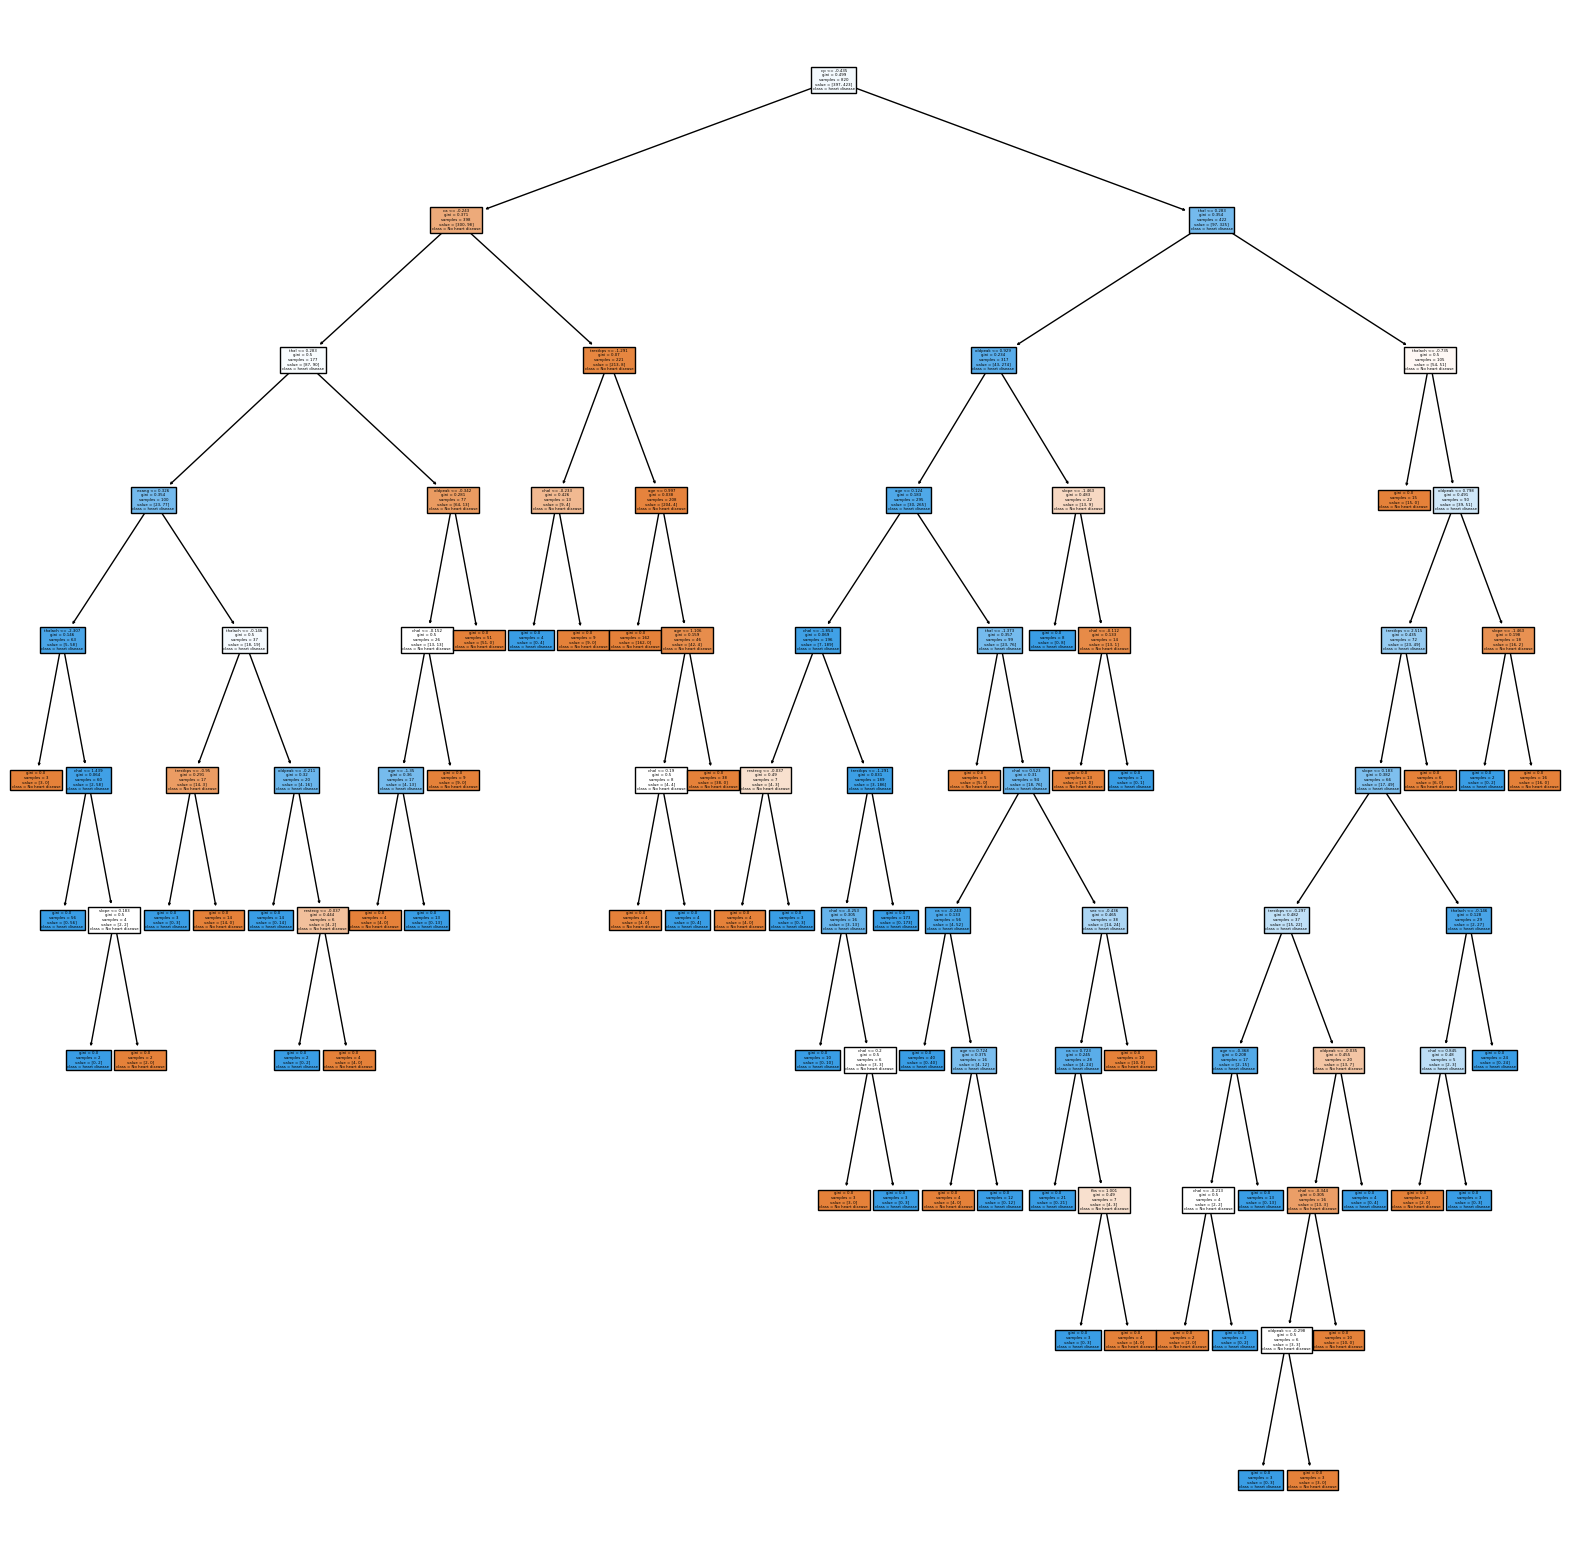

In [41]:
#visualization the decision tree
plt.figure(figsize=(20,20))
features=df.columns
classes = ['No heart disease','heart disease']
tree.plot_tree(learner,feature_names=features,class_names=classes,filled=True)
plt.show()

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
print(f'training accurancy{accuracy_score(y_train_pred,y_train)}')

training accurancy1.0


In [44]:
print(f'Test accurancy{accuracy_score(y_test_pred,y_test)}')

Test accurancy0.9853658536585366


In [45]:
#post proning - Cost complexity proning approach
path= learner.cost_complexity_pruning_path(x_train,y_train)
#path variable gives two values:ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha provides list of values:",ccp_alphas)
print("Impurities in Decision Tree:",impurities)

ccp alpha provides list of values: [0.         0.00215208 0.00226481 0.00227082 0.00235772 0.00240031
 0.00297256 0.00318949 0.00325203 0.00418118 0.00418118 0.00418118
 0.00433604 0.00452962 0.00455285 0.0046187  0.0050813  0.00515244
 0.00542005 0.00602582 0.00651181 0.00739406 0.00746055 0.00796116
 0.00839311 0.00871379 0.00942337 0.01050048 0.01070637 0.01072929
 0.01195087 0.02758056 0.03834657 0.05346744 0.13712382]
Impurities in Decision Tree: [0.         0.00430416 0.00656897 0.0111106  0.01582605 0.02302698
 0.0289721  0.03854058 0.04179261 0.0459738  0.05015498 0.05433617
 0.05867221 0.06773144 0.07228429 0.08152168 0.08660298 0.09175542
 0.10259551 0.10862133 0.11513314 0.12252721 0.12998775 0.16183237
 0.17022549 0.17893928 0.18836265 0.19886313 0.20956949 0.23102807
 0.24297894 0.2705595  0.30890607 0.36237351 0.49949732]


In [46]:
All_learners=[]
for ccp_alpha in ccp_alphas:
    learner=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    learner.fit(x_train,y_train)
    All_learners.append(learner)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(All_learners[-1].tree_, ccp_alphas[-1]))

Last node in Decision tree is <sklearn.tree._tree.Tree object at 0x0000014BEB76FC00> and ccp_alpha for last node is 0.13712381521015055


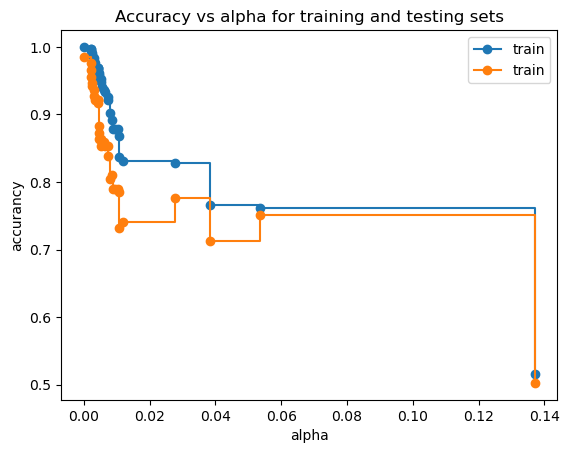

In [47]:
#visulizing the accurancy for train and test set
train_scores = [learner.score(x_train,y_train) for learner in All_learners]
test_scores = [learner.score(x_test,y_test) for learner in All_learners]
fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accurancy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='train',drawstyle='steps-post')
ax.legend()
plt.show()

The plot displays the accuracy of the model on the training set and the testing set as a function of the complexity parameter (ccp_alpha).
As the complexity parameter increases (meaning more aggressive pruning), the accuracy of the model on the training set tends to decrease.
This is because overly aggressive pruning may lead to underfitting the training data.
On the other hand, the accuracy on the testing set may initially increase with increasing ccp_alpha as the model generalizes better,
but after a certain point,
it may start to decrease due to excessive pruning,
leading to overfitting.
The goal is to find the optimal value of ccp_alpha that maximizes the accuracy on the testing set without sacrificing 
too much accuracy on the training set, thus achieving good generalization performance.

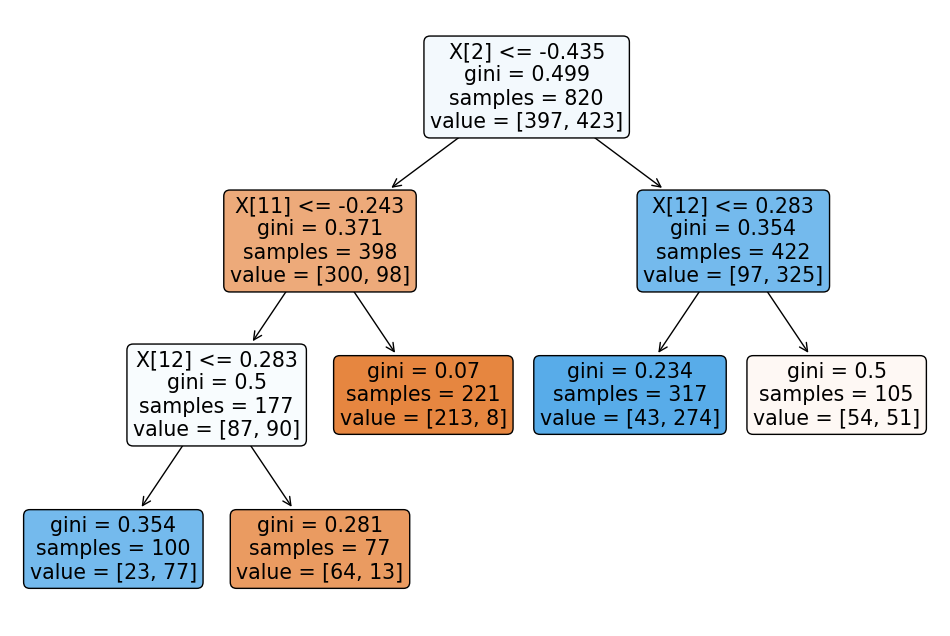

0.7414634146341463


In [48]:
#choose the point with law bias(Low traning error) and low variance (low test error) i.e  alpha=0.02
learner=tree.DecisionTreeClassifier (random_state=0,ccp_alpha=0.02)
learner.fit(x_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(learner,rounded=True,filled=True)
plt.show()

print(accuracy_score(y_test,learner.predict(x_test)))

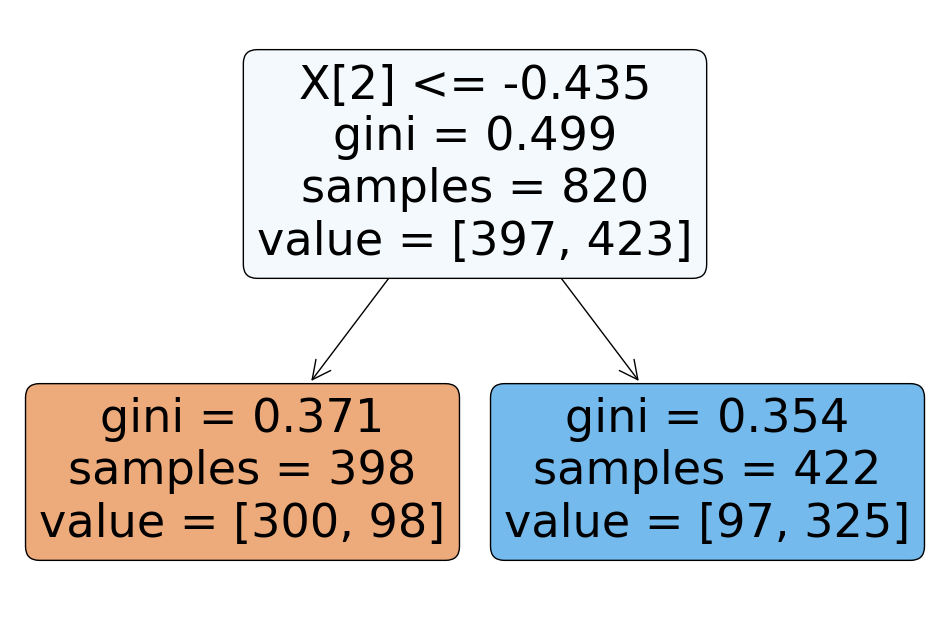

0.751219512195122


In [49]:
learner=tree.DecisionTreeClassifier (random_state=0,ccp_alpha=0.12)
learner.fit(x_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(learner,rounded=True,filled=True)
plt.show()

print(accuracy_score(y_test,learner.predict(x_test)))

In [50]:
learner=tree.DecisionTreeClassifier (random_state=42)
learner.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
#PRE-pruning
grid_param ={"criterion":["gini","entropy"],
            "splitter":["best","random"],
            "max_depth":range(2,5,1),
             "min_samples_leaf":range(1,15,1),
            "min_samples_split":range(2,20,1)}

grid_search=GridSearchCV(estimator=learner,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 5),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [53]:
#Extract best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


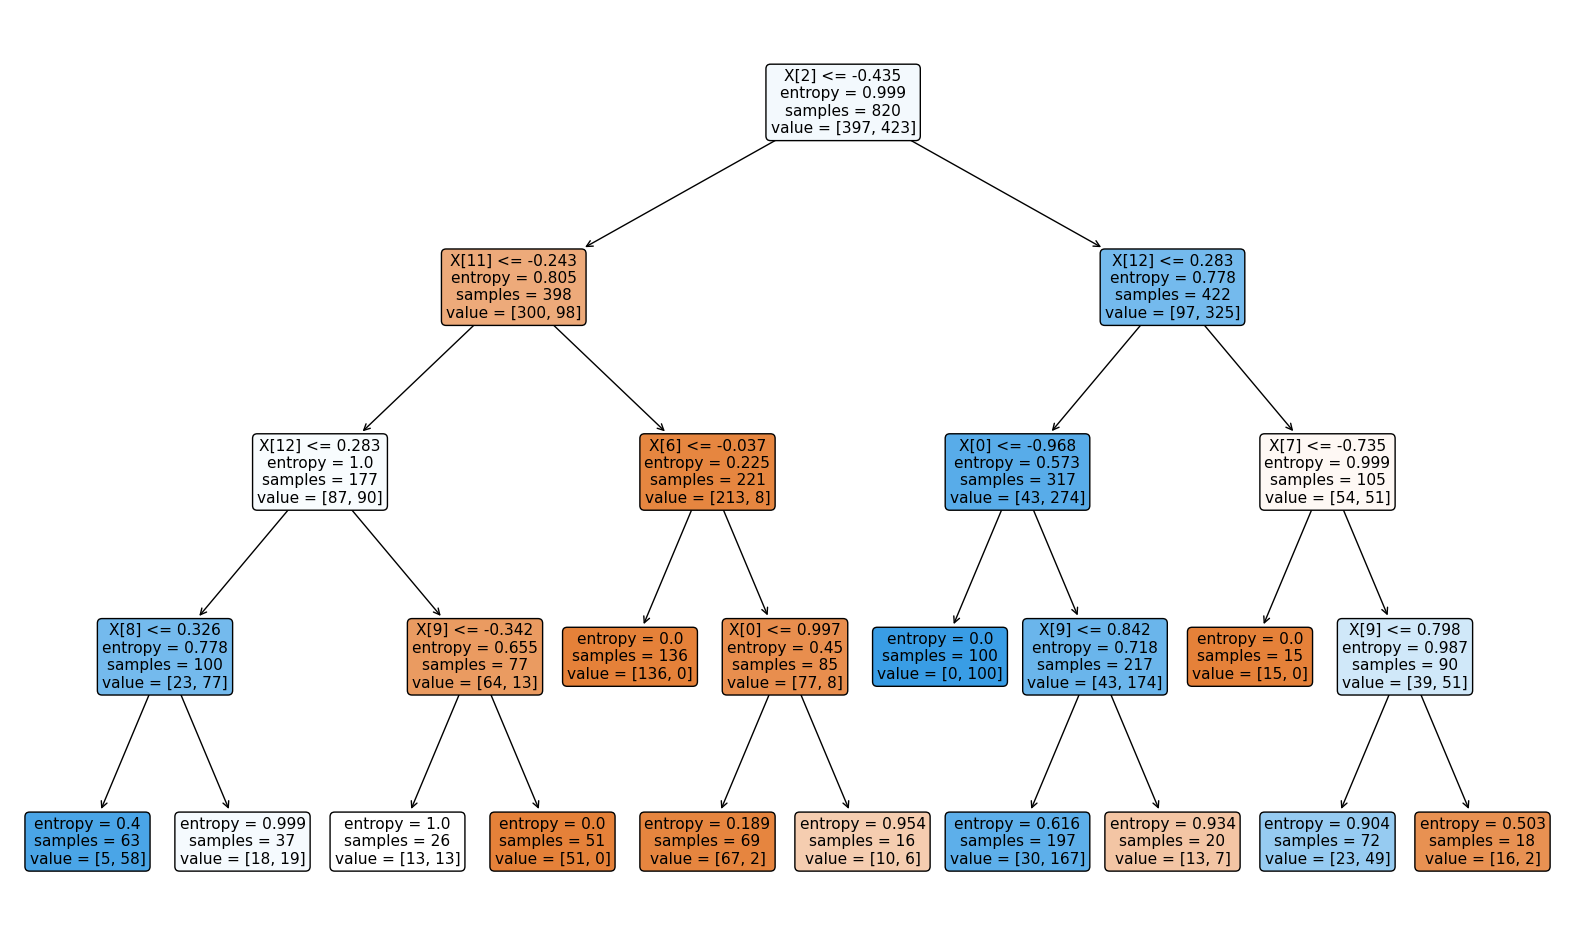

In [54]:
learner=tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 10, min_samples_split= 2, splitter= 'best')
learner.fit(x_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(learner, rounded=True, filled=True)
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier
x = df.drop('target', axis=1) # Features
y = df['target'] # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]


# Random forest

In [56]:
from sklearn.naive_bayes import GaussianNB
x = df.drop('target', axis=1)  # Features
y = df['target']  # Labels

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred = nb_classifier.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

